Overall Metrics:
accuracy: 0.574
macro_precision: 0.526
macro_recall: 0.507
macro_f1: 0.491


<Figure size 1000x500 with 0 Axes>

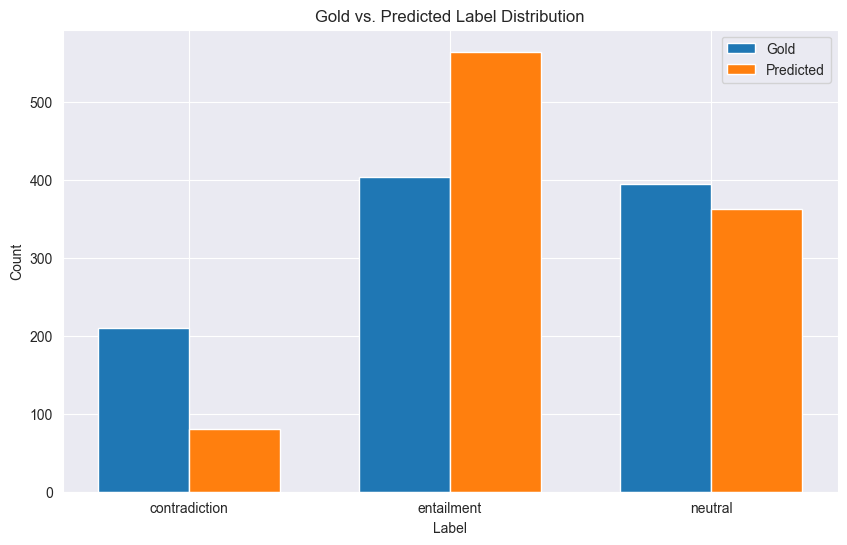

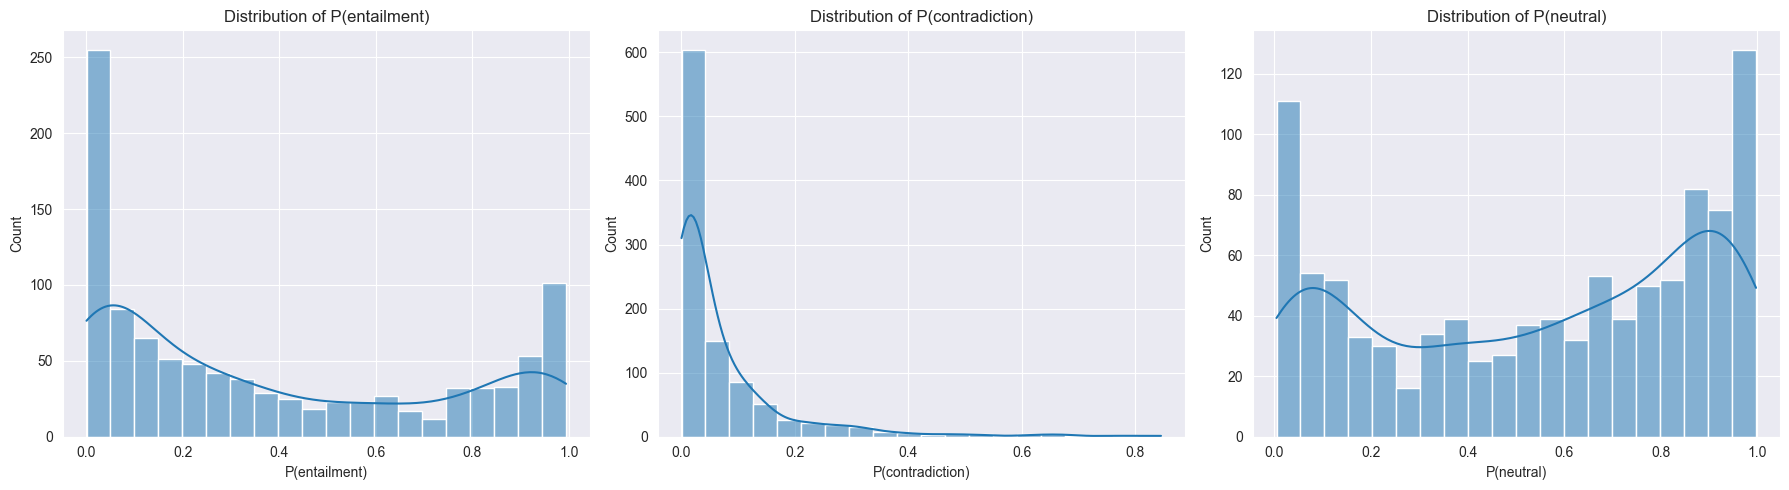

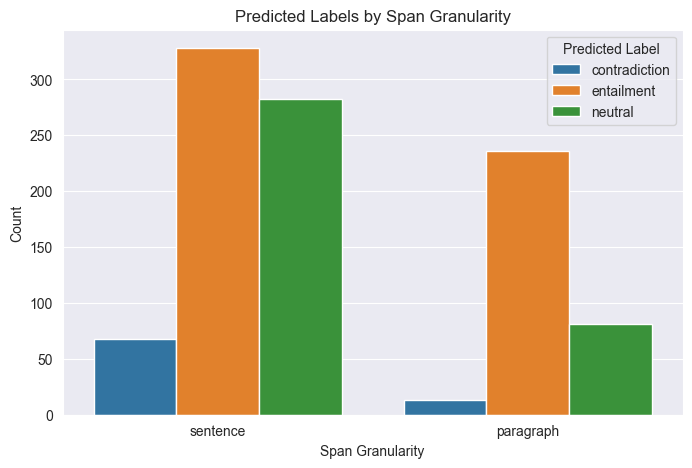

In [52]:
# %% [code]
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results JSON file
results_file = "nli_verification_results_full.json"  
with open(results_file, "r", encoding="utf-8") as f:
    results_data = json.load(f)

# Extract overall metrics (if stored) and per-claim results.
metrics = results_data.get("metrics", {})
results = results_data.get("results", [])

print("Overall Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")

# Convert results to a DataFrame
df = pd.DataFrame(results)
df.head()

# %% [code]
# Side-by-side label distribution for Gold vs. Predicted labels
plt.figure(figsize=(10, 5))
# Count gold labels
gold_counts = df["gold_label"].value_counts().sort_index()
pred_counts = df["pred_label"].value_counts().sort_index()

labels = sorted(set(gold_counts.index) | set(pred_counts.index))
gold_values = [gold_counts.get(label, 0) for label in labels]
pred_values = [pred_counts.get(label, 0) for label in labels]

x = range(len(labels))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, gold_values, width, label='Gold')
ax.bar([p + width for p in x], pred_values, width, label='Predicted')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.set_xlabel("Label")
ax.set_ylabel("Count")
ax.set_title("Gold vs. Predicted Label Distribution")
ax.legend()
plt.show()

# %% [code]
# Overall distributions of p_entail, p_contr, and p_neut
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["p_entail"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of P(entailment)")
axes[0].set_xlabel("P(entailment)")

sns.histplot(df["p_contr"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of P(contradiction)")
axes[1].set_xlabel("P(contradiction)")

sns.histplot(df["p_neut"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of P(neutral)")
axes[2].set_xlabel("P(neutral)")
plt.tight_layout()
plt.show()

# %% [code]
# Correlation between predicted labels and span granularity
# We assume the "span_granularity" column is available in the DataFrame.
if "span_granularity" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="span_granularity", hue="pred_label", data=df, order=["sentence", "paragraph"])
    plt.title("Predicted Labels by Span Granularity")
    plt.xlabel("Span Granularity")
    plt.ylabel("Count")
    plt.legend(title="Predicted Label")
    plt.show()
else:
    print("Column 'span_granularity' not found in the DataFrame.")